In [1]:
import numpy as np
import math
from scipy.stats import norm
from matplotlib import pyplot as plt
import cvxpy as cp

# Графики функции выплат

Пример 1. Постройте графики функции выплат для опционов колл (покупка, продажа) и пут (покупка, продажа).

In [11]:
def payoff_buy_call(S, K):
    return np.maximum(S - K, 0)

def payoff_buy_put(S, K):
    return np.maximum(K - S, 0)

def payoff_sell_call(S, K):
    return -payoff_buy_call(S, K)

def payoff_sell_put(S, K):
    return -payoff_buy_put(S, K)

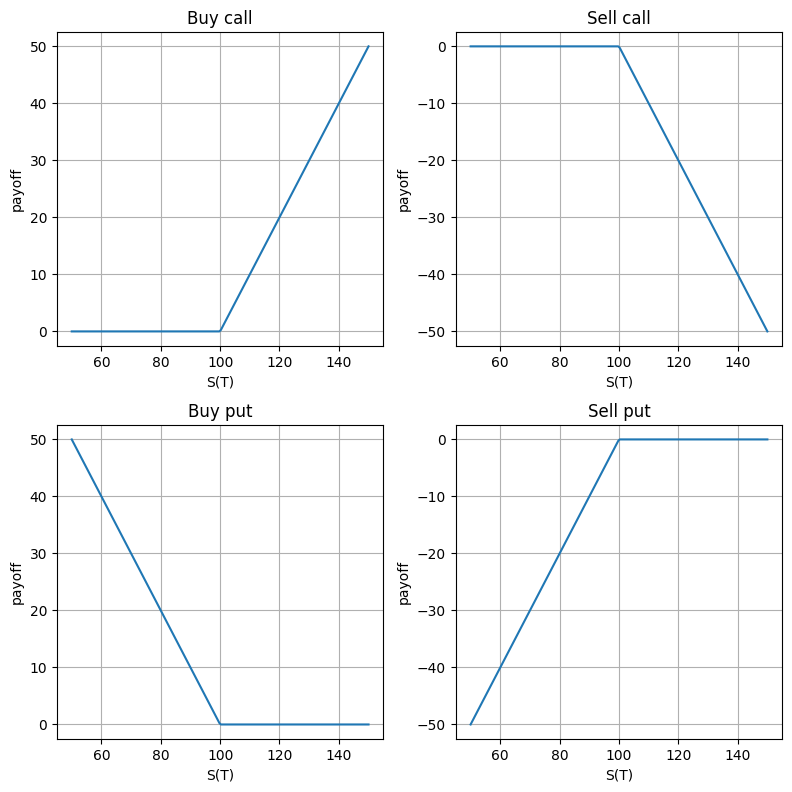

In [12]:
K = 100
S = np.linspace(50, 150, 200)

fig, ax = plt.subplots(2, 2, figsize = (8,8))
ax[0][0].plot(S, payoff_buy_call(S, K))
ax[0][0].set_xlabel("S(T)")
ax[0][0].set_ylabel("payoff")
ax[0][0].grid(True)
ax[0][0].set_title("Buy call")

ax[0][1].plot(S, payoff_sell_call(S, K))
ax[0][1].set_xlabel("S(T)")
ax[0][1].set_ylabel("payoff")
ax[0][1].grid(True)
ax[0][1].set_title("Sell call")

ax[1][0].plot(S, payoff_buy_put(S, K))
ax[1][0].set_xlabel("S(T)")
ax[1][0].set_ylabel("payoff")
ax[1][0].grid(True)
ax[1][0].set_title("Buy put")

ax[1][1].plot(S, payoff_sell_put(S, K))
ax[1][1].set_xlabel("S(T)")
ax[1][1].set_ylabel("payoff")
ax[1][1].grid(True)
ax[1][1].set_title("Sell put")

fig.tight_layout(pad=1.0)

## Задача (Collar)

  Допустим, что текущая цена базового актива равна 70.65, страйки опциона пут и колл равны 65 и 75 соответственно, а оценки их стоимости (премии) равны 2 и 3.25 соответственно. Постройте стратегию, которая заключается в покупке опциона пут и продаже опциона колл.

Определите максимальную прибыль и потери, если цена базового актива может вырасти в два раза (меньше нуля не может быть). Определите интервал безубыточности стратегии с учетом премии. Постройте график функции выплат для опционной стратегии.

https://blog.quantinsti.com/collar-options-trading-strategy-python/


Интервал безубыточности стратегии с учетом премии:
  - Нижняя граница: 66.25
  - Верхняя граница: 76.25

Max Profit: 66.25
Max Loss: -64.75


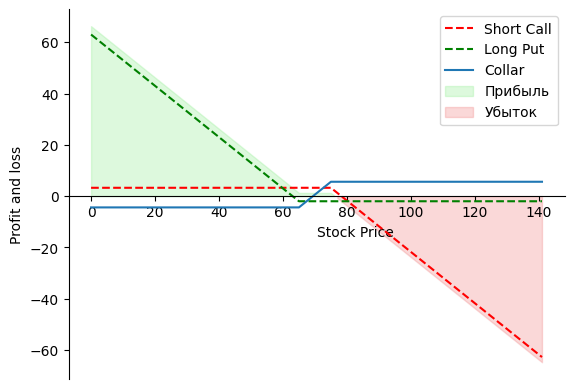

In [7]:
spot_price = 70.65
strike_price_long_put = 65
premium_long_put = 2


strike_price_short_call = 75
premium_short_call = 3.25


sT = np.arange(0,2*spot_price,1)

def call_payoff(sT, strike_price, premium):
    return np.where(sT < strike_price, premium,+ premium -sT + strike_price)

payoff_short_call = call_payoff (sT, strike_price_short_call, premium_short_call)

def put_payoff(sT, strike_price, premium):
    return np.where(sT < strike_price, strike_price - sT, 0) - premium

payoff_long_put = put_payoff(sT, strike_price_long_put, premium_long_put)

payoff_collar = payoff_short_call + payoff_long_put


break_even_lower = strike_price_long_put - premium_long_put + premium_short_call
break_even_upper = strike_price_short_call + premium_short_call - premium_long_put

print(f"Интервал безубыточности стратегии с учетом премии:")
print(f"  - Нижняя граница: {break_even_lower:.2f}")
print(f"  - Верхняя граница: {break_even_upper:.2f}\n")

print ("Max Profit:", max(payoff_collar))
print ("Max Loss:", min(payoff_collar))

fig, ax = plt.subplots()
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False) 
ax.spines['bottom'].set_position('zero') 
ax.plot(sT,payoff_short_call,'--',label='Short Call',color='r')
ax.plot(sT,payoff_long_put,'--',label='Long Put',color='g')
ax.plot(sT,payoff_collar+sT-spot_price,label='Collar')
plt.fill_between(sT, payoff_collar, 0, where=(payoff_collar > 0), color='lightgreen', alpha=0.3, label="Прибыль")
plt.fill_between(sT, payoff_collar, 0, where=(payoff_collar < 0), color='lightcoral', alpha=0.3, label="Убыток")
plt.xlabel('Stock Price', ha='left')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

## Задача (Long Straddle)

Допустим, что текущая цена базового актива равна 172.5, страйки опциона пут и колл однинаковые и равны 200, а премии опционов равны 29.25 и 0.04 соответственно. Постройте стратегию, которая заключается в покупке опциона пут и покупке опциона колл.

Определите максимальную прибыль и потери, если цена базового актива может вырасти в два раза (меньше нуля не может быть). Определите интервал безубыточности стратегии с учетом премии. Постройте график функции выплат для опционной стратегии.

https://blog.quantinsti.com/straddle-options-trading-strategy-python/

Параметр                       | Значение                      
-------------------------------------------------------------
Интервал безубыточности        | 170.71 - 229.29
Максимальная потеря            | 29.29
Максимальная прибыль           | Теоретически не ограничена    


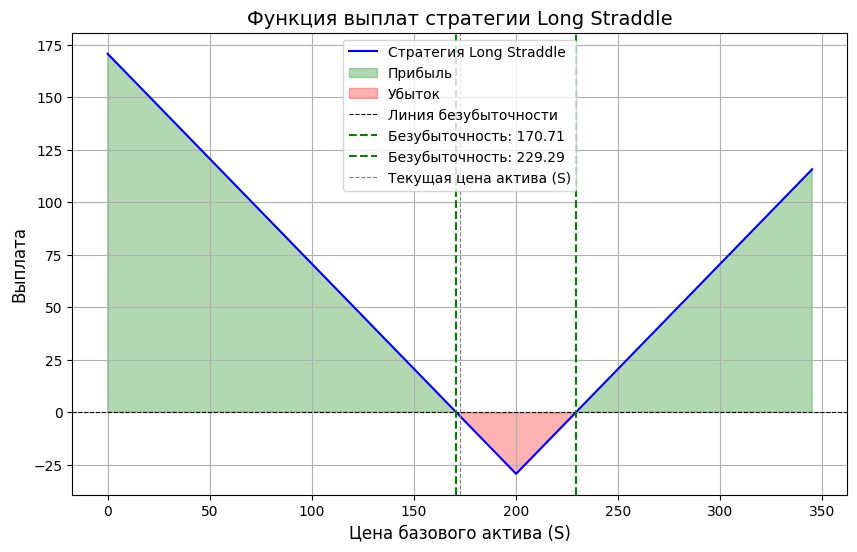

In [18]:
# Цена базового актива
S = 172.5

# Long put
K_long_put = 200
premium_long_put = 29.25

# Long call
K_long_call = 200
premium_long_call = 0.04

S_range = np.linspace(0, 2 * S, 1000)


long_put_payoff = np.maximum(K_long_put - S_range, 0) - premium_long_put
long_call_payoff = np.maximum(S_range - K_long_call, 0) - premium_long_call


straddle_payoff = long_put_payoff + long_call_payoff

breakeven_low = K_long_put - (premium_long_put + premium_long_call)
breakeven_high = K_long_call + (premium_long_put + premium_long_call)


max_loss = premium_long_put + premium_long_call

# Максимальная прибыль - теоретически не ограничена, т.к. цена актива может расти или падать бесконечно


print(f"{'Параметр':<30} | {'Значение':<30}")
print("-" * 61)
print(f"{'Интервал безубыточности':<30} | {breakeven_low:.2f} - {breakeven_high:.2f}")
print(f"{'Максимальная потеря':<30} | {max_loss:.2f}")
print(f"{'Максимальная прибыль':<30} | {'Теоретически не ограничена':<30}")

plt.figure(figsize=(10, 6))

plt.plot(S_range, straddle_payoff, label="Стратегия Long Straddle", color="blue")
plt.fill_between(S_range, straddle_payoff, 0, where=(straddle_payoff > 0), 
                 color="green", alpha=0.3, label="Прибыль")

plt.fill_between(S_range, straddle_payoff, 0, where=(straddle_payoff < 0), 
                 color="red", alpha=0.3, label="Убыток")

plt.axhline(0, color="black", linewidth=0.8, linestyle="--", label="Линия безубыточности")
plt.axvline(breakeven_low, color="green", linestyle="--", label=f"Безубыточность: {breakeven_low:.2f}")
plt.axvline(breakeven_high, color="green", linestyle="--", label=f"Безубыточность: {breakeven_high:.2f}")
plt.axvline(S, color="gray", linewidth=0.8, linestyle="--", label="Текущая цена актива (S)")

plt.title("Функция выплат стратегии Long Straddle", fontsize=14)
plt.xlabel("Цена базового актива (S)", fontsize=12)
plt.ylabel("Выплата", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Биноминальная модель

In [19]:
# plot_binomial_tree: visualisation of the tree and state prices
def plot_binomial_tree(statePrices):
    for i in range(0,n+1):
        for j in range(0,n+1):
            if j>i:
                break
            if i<n:
                x1, y1 = [i, i+1], [2*j-(i-1),2*j+1-(i-1)]
                plt.plot(x1, y1, marker = 'o',color="red")
                x1, y1 = [i, i+1], [2*j-(i-1),2*j-1-(i-1)]
                plt.plot(x1, y1, marker = 'o',color="black")
            plt.text(i-0.2,2*j-(i-1)-0.6,"%.2f" % statePrices["payoff"][i][j])
            plt.text(i-0.2,2*j-(i-1)-1.0,"%.2f" % statePrices["underlying"][i][j],color="blue")
    plt.title("Биноминальное дерево")
    plt.xlabel("p=%.1f%%, u=%.3f, r=%.2f%%, q=%.2f%%, dt=%.2fdays" % (statePrices["p"]*100,
                                                                   statePrices["u"],
                                                                   statePrices["r"]*100,
                                                                   statePrices["q"]*100,
                                                                   statePrices["dt"]*365))
    plt.show()

In [20]:
# binomial_tree_pricer

def binomial_tree_pricer(r, q, sigma, T, n, S, payoff, american=True, showStatePrices=False):
# r: risk neutral rate
# q: dividend yield
# sigma: volatility
# T: maturity in years
# n: number of time steps
# S: spot stock price
# payoff: payoff function e.g.: lambda S: max(S-K,0)
# american: early exercise: True if american, otherwise European
# showStatePrices: print tree probabilities and state prices

    dt = T/n
    up  = np.exp(sigma*np.sqrt(dt))
    p0 = (up * np.exp((r-q) * dt) - 1) / (up**2 - 1)
    p1 = 1 - p0
    df = np.exp(-r * dt)
    # initial values at time T
    statePrices = {"p":p0, "u":up, "r":r, "q":q, "dt":dt}
    if showStatePrices:
        statePrices["payoff"]=np.zeros((n+1,n+1))
        statePrices["underlying"]=np.zeros((n+1,n+1))
    p = np.zeros(n+1)
    for i in range(n+1): # i from 0 to n incl
        p[i] = payoff(S * up**(2*i - n))
        if showStatePrices:
            statePrices["payoff"][n][i] = p[i]
            statePrices["underlying"][n][i] = S * up**(2*i - n)
    # move to earlier times
    for j in range(n-1,-1,-1): # j from n-1 to 0 incl
        for i in range(j+1): # i from 0 to j incl
            # discounted expected value of exdiv price
            p[i] = (p0 * p[i+1] + p1 * p[i])*df
            # american payoff
            if american:
                early_exercise = payoff(S * up**(2*i - j))
                p[i] = max(early_exercise,p[i])
            if showStatePrices:
                statePrices["payoff"][j][i] = p[i]
                statePrices["underlying"][j][i] = S * up**(2*i - j)
    if showStatePrices:
        plot_binomial_tree(statePrices)
    return p[0]

Пример. Текущая цена акций равна 50, волатильность 15%, цена страйк на 1% выше цены базового актива, время до экспирации 1 месяц, безрисковая ставка 5%, на акции начисляются дивиденды 2%. Постройте биноминальное дерево на 5 периодов для европейского опциона пут и оцените его стоимость.

Биноминальное дерево, европейский опцион пут, функция выплат max(K-S, 0)


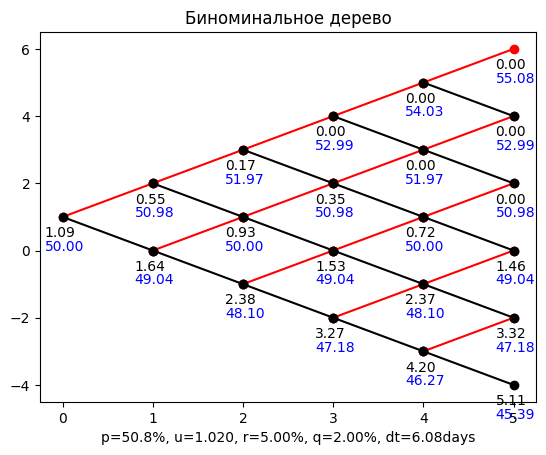

np.float64(1.0853174417962133)

In [21]:
r, q, sigma, T, n, S = 0.05, 0.02, 0.15, 1/12, 5, 50
K = S*1.01
print("Биноминальное дерево, европейский опцион пут, функция выплат max(K-S, 0)")
binomial_tree_pricer(r, q, sigma, T, n, S, lambda S: max(K-S,0), american=False, showStatePrices=True)

## Задача (дерево)

Задача. Постройте биноминальные деревья для
*   американского опциона колл,
*   американского опциона пут,
*   европейского опциона колл,
*   европейского опциона пут
и сделайте выводы.





Американский опцион колл


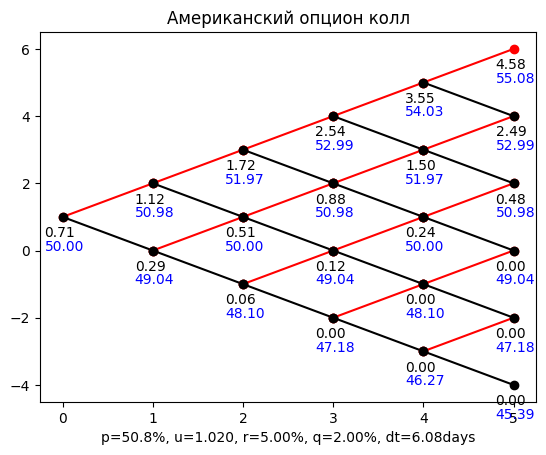

Стоимость опциона (Американский, Американский опцион колл): 0.712032
Американский опцион пут


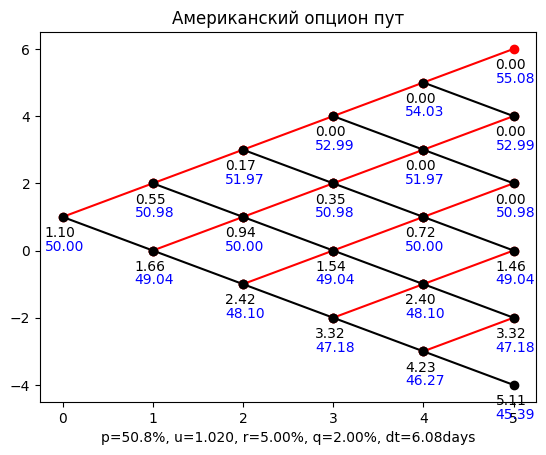

Стоимость опциона (Американский, Американский опцион пут): 1.096278
Европейский опцион колл


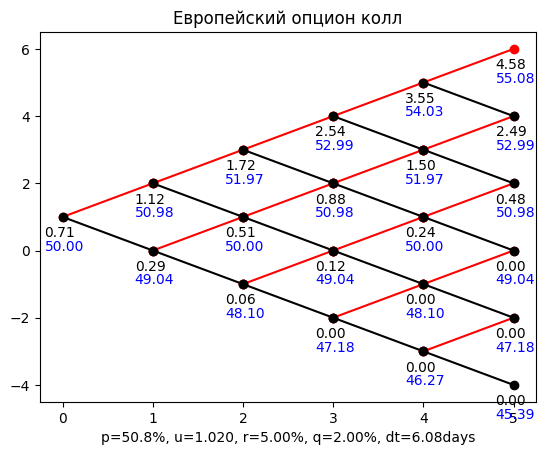

Стоимость опциона (Европейский, Европейский опцион колл): 0.712032
Европейский опцион пут


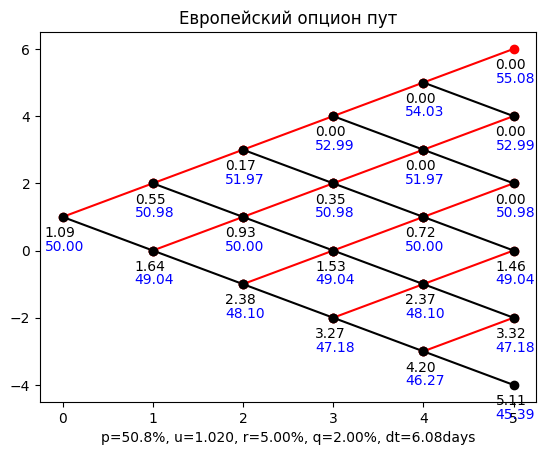

Стоимость опциона (Европейский, Европейский опцион пут): 1.085317


np.float64(1.0853174417962133)

In [10]:
def plot_binomial_tree(statePrices, title):
    for i in range(0, n+1):
        for j in range(0, n+1):
            if j > i:
                break
            if i < n:
                x1, y1 = [i, i+1], [2*j-(i-1), 2*j+1-(i-1)]
                plt.plot(x1, y1, marker='o', color="red")
                x1, y1 = [i, i+1], [2*j-(i-1), 2*j-1-(i-1)]
                plt.plot(x1, y1, marker='o', color="black")
            plt.text(i-0.2, 2*j-(i-1)-0.6, "%.2f" % statePrices["payoff"][i][j])
            plt.text(i-0.2, 2*j-(i-1)-1.0, "%.2f" % statePrices["underlying"][i][j], color="blue")
    plt.title(title)
    plt.xlabel("p=%.1f%%, u=%.3f, r=%.2f%%, q=%.2f%%, dt=%.2fdays" % (statePrices["p"]*100,
                                                                      statePrices["u"],
                                                                      statePrices["r"]*100,
                                                                      statePrices["q"]*100,
                                                                      statePrices["dt"]*365))
    plt.show()

def binomial_tree_pricer(r, q, sigma, T, n, S, payoff, american=True, title="", showStatePrices=False):
    dt = T / n
    up = np.exp(sigma * np.sqrt(dt))
    p0 = (up * np.exp((r - q) * dt) - 1) / (up**2 - 1)
    p1 = 1 - p0
    df = np.exp(-r * dt)

    statePrices = {"p": p0, "u": up, "r": r, "q": q, "dt": dt}
    if showStatePrices:
        statePrices["payoff"] = np.zeros((n+1, n+1))
        statePrices["underlying"] = np.zeros((n+1, n+1))

    p = np.zeros(n+1)
    for i in range(n+1):
        p[i] = payoff(S * up**(2*i - n))
        if showStatePrices:
            statePrices["payoff"][n][i] = p[i]
            statePrices["underlying"][n][i] = S * up**(2*i - n)

    for j in range(n-1, -1, -1):
        for i in range(j+1):
            p[i] = (p0 * p[i+1] + p1 * p[i]) * df
            if american:
                early_exercise = payoff(S * up**(2*i - j))
                p[i] = max(early_exercise, p[i])
            if showStatePrices:
                statePrices["payoff"][j][i] = p[i]
                statePrices["underlying"][j][i] = S * up**(2*i - j)

    if showStatePrices:
        plot_binomial_tree(statePrices, title)

    print(f"Стоимость опциона ({'Американский' if american else 'Европейский'}, {title}): {p[0]:.6f}")
    return p[0]



r, q, sigma, T, n, S = 0.05, 0.02, 0.15, 1/12, 5, 50
K = S * 1.01

print("Американский опцион колл")
binomial_tree_pricer(r, q, sigma, T, n, S, lambda S: max(S - K, 0), american=True, 
                     title="Американский опцион колл", showStatePrices=True)

print("Американский опцион пут")
binomial_tree_pricer(r, q, sigma, T, n, S, lambda S: max(K - S, 0), american=True, 
                     title="Американский опцион пут", showStatePrices=True)

print("Европейский опцион колл")
binomial_tree_pricer(r, q, sigma, T, n, S, lambda S: max(S - K, 0), american=False, 
                     title="Европейский опцион колл", showStatePrices=True)

print("Европейский опцион пут")
binomial_tree_pricer(r, q, sigma, T, n, S, lambda S: max(K - S, 0), american=False, 
                     title="Европейский опцион пут", showStatePrices=True)

европейский и американский опционы колл равны по стоимости, если актив не выплачивает дивиденды


1. **Американские опционы (колл и пут):**  
   Американские опционы позволяют досрочное исполнение, что увеличивает их стоимость по сравнению с европейскими аналогами. Особенно это заметно для опциона пут, где досрочное исполнение может быть выгодным в условиях падения цены базового актива.

2. **Европейские опционы (колл и пут):**  
   Европейские опционы не допускают досрочного исполнения, их стоимость полностью определяется вероятностями движения цен базового актива и сроком до истечения. Как правило, европейские опционы дешевле американских.

3. **Опцион колл:**  
   Стоимость опциона колл увеличивается с ростом цены базового актива. Для американского колла досрочное исполнение редко имеет смысл (если нет дивидендов), так как временная стоимость опциона делает его удержание более выгодным.

4. **Опцион пут:**  
   Стоимость опциона пут увеличивается с падением цены базового актива. Для американского пута досрочное исполнение может быть выгодным, особенно если цена базового актива значительно ниже страйковой.

5. **Влияние параметров:**  
   Увеличение волатильности, срока до истечения или безрисковой ставки повышает стоимость всех опционов. Однако этот эффект сильнее выражен для опционов с длительным сроком до истечения.

6. **Деревья:**  
   Графики биномиального дерева показывают, как цена опциона определяется вероятностями движения цен базового актива. Американские опционы имеют более сложную структуру дерева из-за учета возможности досрочного исполнения.


# Модель Блека-Шоулза

Задача. Допустим, что условия модели Блека-Шоулза выполнены. Текущая цена бездивидентных акций равна 100, волатальность
5%, цена страйк 100, время до экспирации один год, безрисковая
ставка 5%.

Оцените справедливую стоимость опционов колл и пут и вычислите греческие характеристики для опционов как функцию от текущей цены базового актива.

In [25]:
r = 0.07
T = 1
K = 100
S0 = 100
sigma = 0.3
t = 0
q = 0
tau = T - t

In [26]:
from scipy.stats import norm

def d1(S, K, r, q, sigma, T):
    return (np.log(S / K) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))

def d2(S, K, r, q, sigma, T):
    return d1(S, K, r, q, sigma, T) - sigma * np.sqrt(T)


def call_price(S, K, r, q, sigma, T):
    d1_val = d1(S, K, r, q, sigma, T)
    d2_val = d2(S, K, r, q, sigma, T)
    return S * np.exp(-q * T) * norm.cdf(d1_val) - K * np.exp(-r * T) * norm.cdf(d2_val)

def put_price(S, K, r, q, sigma, T):
    d1_val = d1(S, K, r, q, sigma, T)
    d2_val = d2(S, K, r, q, sigma, T)
    return K * np.exp(-r * T) * norm.cdf(-d2_val) - S * np.exp(-q * T) * norm.cdf(-d1_val)

def delta(S, K, r, q, sigma, T, option_type="call"):
    d1_val = d1(S, K, r, q, sigma, T)
    if option_type == "call":
        return np.exp(-q * T) * norm.cdf(d1_val)
    elif option_type == "put":
        return np.exp(-q * T) * (norm.cdf(d1_val) - 1)

def gamma(S, K, r, q, sigma, T):
    d1_val = d1(S, K, r, q, sigma, T)
    return np.exp(-q * T) * norm.pdf(d1_val) / (S * sigma * np.sqrt(T))

def vega(S, K, r, q, sigma, T):
    d1_val = d1(S, K, r, q, sigma, T)
    return S * np.exp(-q * T) * norm.pdf(d1_val) * np.sqrt(T)

def theta(S, K, r, q, sigma, T, option_type="call"):
    d1_val = d1(S, K, r, q, sigma, T)
    d2_val = d2(S, K, r, q, sigma, T)
    if option_type == "call":
        theta_call = (-S * np.exp(-q * T) * norm.pdf(d1_val) * sigma / (2 * np.sqrt(T))
                      - r * K * np.exp(-r * T) * norm.cdf(d2_val)
                      + q * S * np.exp(-q * T) * norm.cdf(d1_val))
        return theta_call
    elif option_type == "put":
        theta_put = (-S * np.exp(-q * T) * norm.pdf(d1_val) * sigma / (2 * np.sqrt(T))
                     + r * K * np.exp(-r * T) * norm.cdf(-d2_val)
                     - q * S * np.exp(-q * T) * norm.cdf(-d1_val))
        return theta_put


call = call_price(S0, K, r, q, sigma, T)
put = put_price(S0, K, r, q, sigma, T)
delta_call = delta(S0, K, r, q, sigma, T, "call")
delta_put = delta(S0, K, r, q, sigma, T, "put")
gamma_val = gamma(S0, K, r, q, sigma, T)
vega_val = vega(S0, K, r, q, sigma, T)
theta_call = theta(S0, K, r, q, sigma, T, "call")
theta_put = theta(S0, K, r, q, sigma, T, "put")

# Вывод
print(f"Call Price: {call:.2f}")
print(f"Put Price: {put:.2f}")
print(f"Delta (Call): {delta_call:.2f}")
print(f"Delta (Put): {delta_put:.2f}")
print(f"Gamma: {gamma_val:.2f}")
print(f"Vega: {vega_val:.2f}")
print(f"Theta (Call): {theta_call:.2f}")
print(f"Theta (Put): {theta_put:.2f}")

Call Price: 15.21
Put Price: 8.45
Delta (Call): 0.65
Delta (Put): -0.35
Gamma: 0.01
Vega: 37.07
Theta (Call): -9.04
Theta (Put): -2.51


## Задача (оценка и паритет)

In [27]:
# оценка опциона колл
def call(S, K, T, sigma, r, q):
    d1 = (np.log (S / K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * np.exp(-q * T) * norm.cdf(d1) - K * np.exp (-r * T) * norm.cdf(d2)

In [28]:
# оценка опциона пут
def put(S, K, T, sigma, r, q):
    d1 = (np.log(S / K) + (r - q + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return K * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(-q * T) * norm.cdf(-d1)

In [29]:
# оценка опциона пут с использованием паритета
def put_paritet(S, K, T, sigma, r, q):
    return call(S, K, T, sigma, r, q) + K * np.exp(-r * T) - S

Сравните результаты оценки опциона пут с/без паритета цен

In [31]:
params = f"r = {r}, sigma = {sigma}, t = {t}, T = {T}, S0 = {S0}, K = {K}"
print('Параметры:', params)

call_price = call(S0, K, T, sigma, r, q)
print('Оценка опциона колл =', call_price)
put_price  =  put(S0, K, T, sigma, r, q)
print('Оценка опциона пут =', put_price)
put_price_parity = put_paritet(S0, K, T, sigma, r, q)
print("Оценка опциона пут (по паритету цен) =", put_price_parity)

Параметры: r = 0.07, sigma = 0.3, t = 0, T = 1, S0 = 100, K = 100
Оценка опциона колл = 15.210500635727158
Оценка опциона пут = 8.449882626321987
Оценка опциона пут (по паритету цен) = 8.44988262632198


## Задача (греческие характеристики)

Вспомогательные функции для аналитического вычисления греческих характеристик.

In [44]:
def delta(S, K, r, T, sigma, option_type):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    if option_type == 'call':
        return norm.cdf(d1)
    elif option_type == 'put':
        return -norm.cdf(-d1)

def gamma(S, K, r, T, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return norm.pdf(d1) / (S * sigma * np.sqrt(T))

def theta(S, K, r, T, sigma, option_type):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == 'call':
        return -(S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        return -(S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * norm.cdf(-d2)

def kappa(S, K, r, T, sigma, option_type):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == 'call':
        return -np.exp(-r*T)*norm.cdf(d2) 
    elif option_type == 'put':
        return np.exp(-r * T) * norm.cdf(-d2)

def vega(S, K, r, T, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return S * norm.pdf(d1)* np.sqrt(T)

def ro(S, K, r, T, sigma, option_type):
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    if option_type == 'call':
        return K * T * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        return -K * T * np.exp(-r * T) * norm.cdf(-d2)

Графики зависимости греческих характеристик для опционов от цены базового актива.

In [48]:
def draw_greek_graphs(K=100, r=0.07, T=1, sigma=0.2, N=1000, option_type='call'):
    greek_titles = ['Delta', 'Gamma', 'Theta', 'Kappa', 'Vega', 'Rho']
    greek_functions = [delta, gamma, theta, kappa, vega, rho]

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    price_range = np.linspace(1, 2 * K, N)  
    
    for ax, func, title in zip(axes.flat, greek_functions, greek_titles):
        if func.__name__ in ['gamma', 'vega']:
            values = [func(S, K, r, T, sigma) for S in price_range]
        else:
            values = [func(S, K, r, T, sigma, option_type) for S in price_range]
        
        ax.plot(price_range, values, label=f"{title} ({option_type.title()})", color='blue')
        ax.axvline(x=K, color='red', linestyle='--', label=f"S = K ({K})")
        ax.set_title(title, fontsize=14)
        ax.set_xlabel("Цена базового актива (S)", fontsize=12)
        ax.set_ylabel(f"{title} значение", fontsize=12)
        ax.grid(True)
        ax.legend()
    
    plt.tight_layout()
    plt.show()

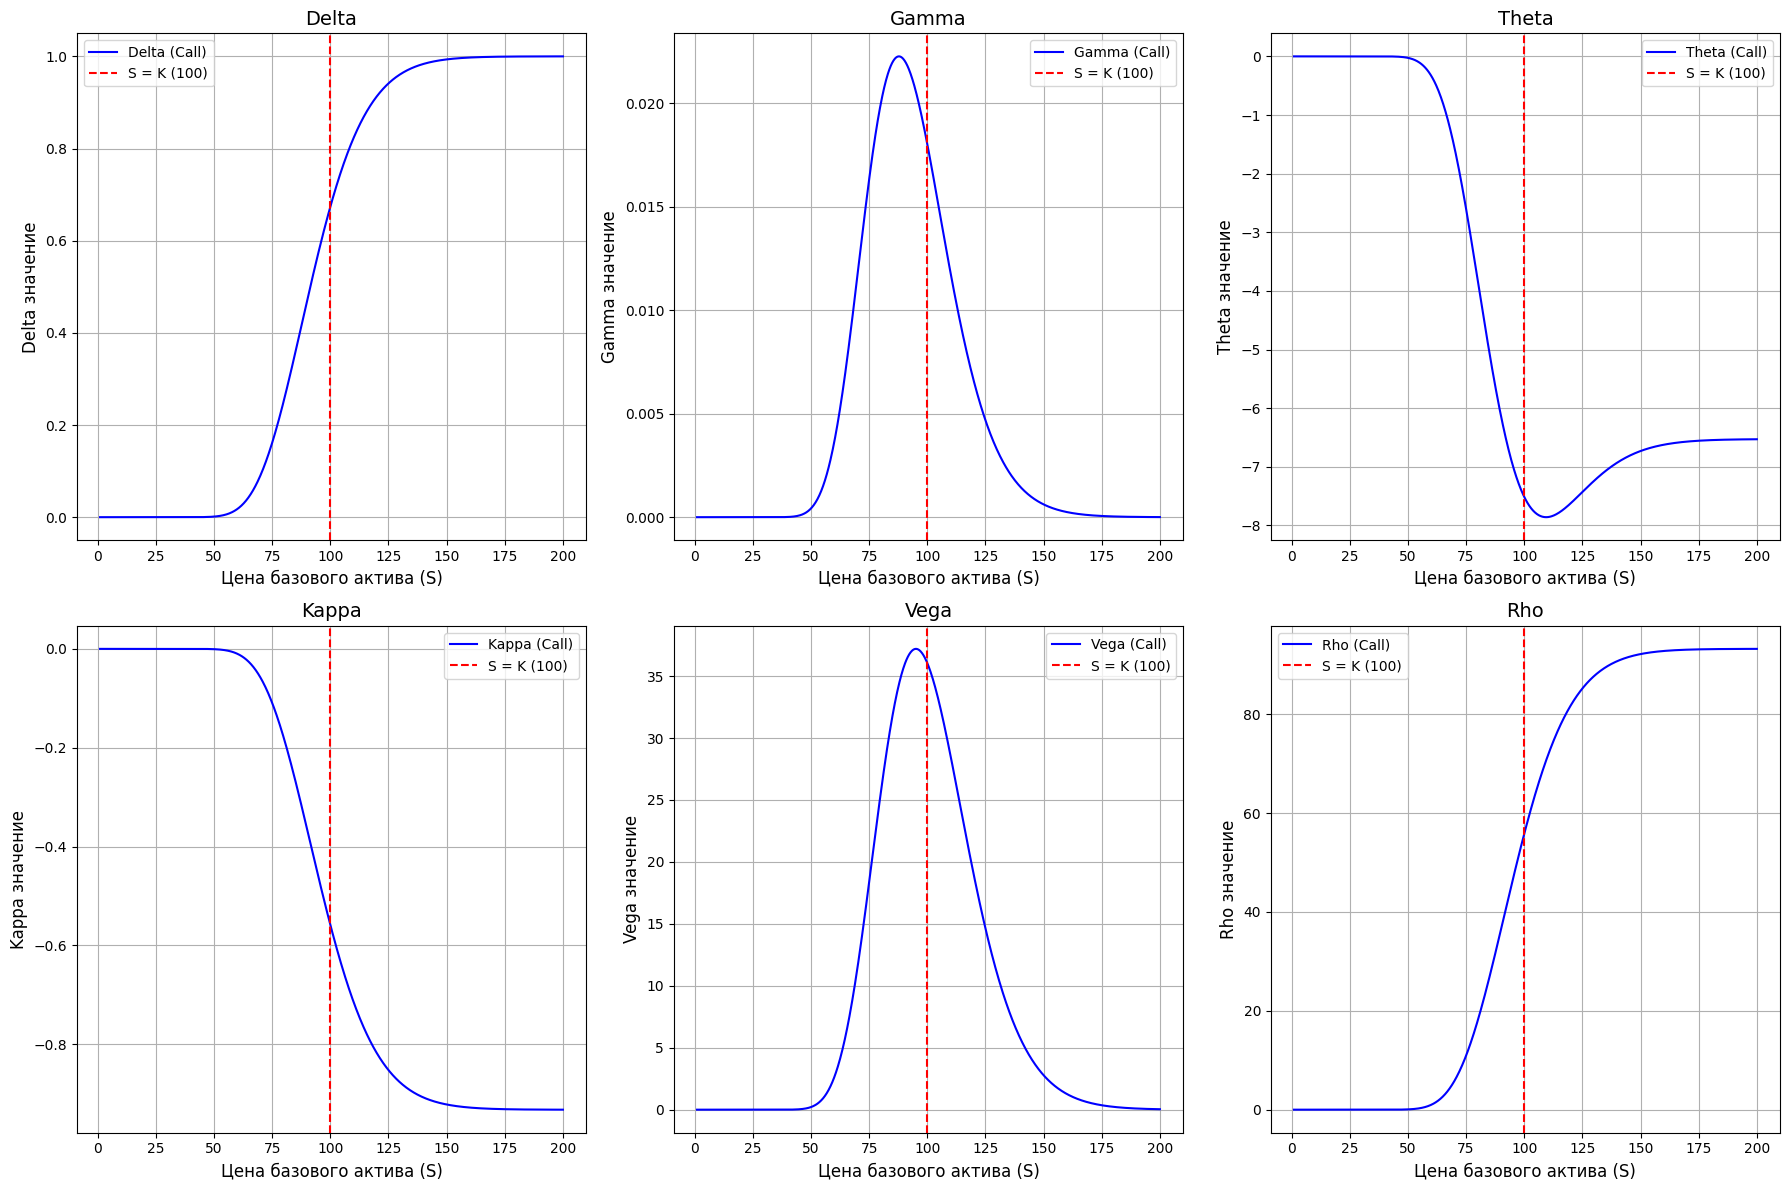

In [49]:
draw_greek_graphs(option_type='call')

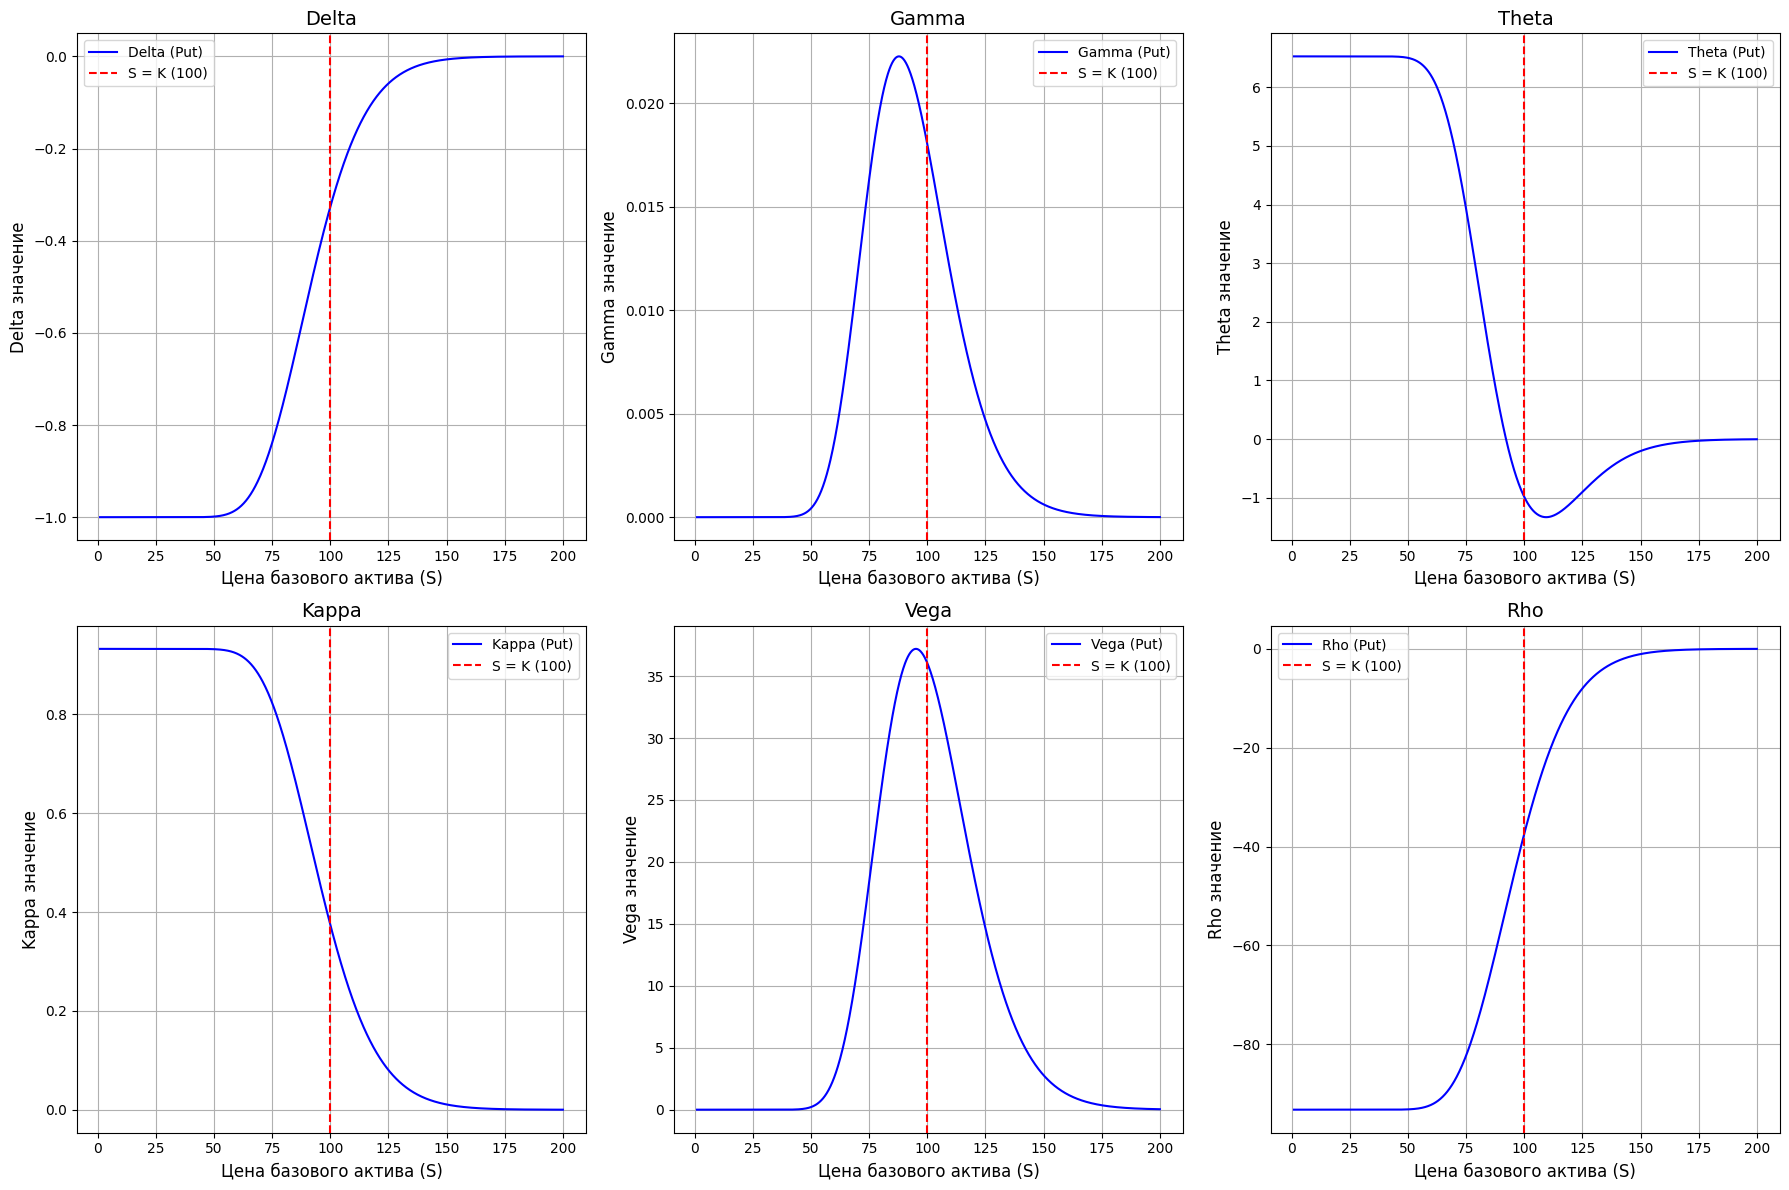

In [50]:
draw_greek_graphs(option_type='put')

Задача. Вычислите греческие коэффициенты численно и сравните результаты.

```
def first_derivative(f, x, h=0.001):
    return (f(x + h) - f(x - h)) / (2 * h)

def second_derivative(f, x, h=0.001):
    return (f(x + h) - 2 * f(x) + f(x - h)) / (h * h)
```




In [51]:
def option_price(S, K, r, T, sigma, option_type):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == 'call':
        return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

def numerical_delta(S, K, r, T, sigma, option_type, h=0.001):
    return (option_price(S + h, K, r, T, sigma, option_type) - 
            option_price(S - h, K, r, T, sigma, option_type)) / (2 * h)

def numerical_gamma(S, K, r, T, sigma, option_type, h=0.001):
    return (option_price(S + h, K, r, T, sigma, option_type) - 
            2 * option_price(S, K, r, T, sigma, option_type) + 
            option_price(S - h, K, r, T, sigma, option_type)) / (h ** 2)

def numerical_vega(S, K, r, T, sigma, option_type, h=0.001):
    return (option_price(S, K, r, T, sigma + h, option_type) - 
            option_price(S, K, r, T, sigma - h, option_type)) / (2 * h)

def numerical_theta(S, K, r, T, sigma, option_type, h=0.001):
    return (option_price(S, K, r, T - h, sigma, option_type) - 
            option_price(S, K, r, T + h, sigma, option_type)) / (2 * h)

def numerical_rho(S, K, r, T, sigma, option_type, h=0.001):
    return (option_price(S, K, r + h, T, sigma, option_type) - 
            option_price(S, K, r - h, T, sigma, option_type)) / (2 * h)

def numerical_kappa(S, K, r, T, sigma, option_type, h=0.001):
    return (option_price(S, K + h, r, T, sigma, option_type) - 
            option_price(S, K - h, r, T, sigma, option_type)) / (2 * h)

In [65]:
def plot_numerical_greeks(S, K, r, T, sigma, option_type):
    greek_titles = ['Delta', 'Gamma', 'Theta', 'Kappa', 'Vega', 'Rho']
    exact_functions = [delta, gamma, theta, kappa, vega, rho]
    numerical_functions = [
        numerical_delta,
        numerical_gamma,
        numerical_theta,
        numerical_kappa,
        numerical_vega,
        numerical_rho,
    ]

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))


    for ax, title, exact_func, num_func in zip(axes.flat, greek_titles, exact_functions, numerical_functions):
        if exact_func.__name__ in ['gamma', 'vega']: 
            exact_values = [exact_func(s, K, r, T, sigma) for s in S]
            numerical_values = [num_func(s, K, r, T, sigma, option_type) for s in S]
        else: 
            exact_values = [exact_func(s, K, r, T, sigma, option_type) for s in S]
            numerical_values = [num_func(s, K, r, T, sigma, option_type) for s in S]

        ax.plot(S, exact_values, label=f'{title} (Exact)', color='blue', linewidth=1.5)
        ax.plot(S, numerical_values, '--', label=f'{title} (Numerical)', color='orange', linewidth=1.5)
        ax.axvline(x=K, color='red', linestyle='--', label=f'S = K ({K})')

  
        ax.set_title(f'{title} Comparison', fontsize=14)
        ax.set_xlabel('Цена базового актива (S)', fontsize=12)
        ax.set_ylabel(f'{title}', fontsize=12)
        ax.grid(True)
        ax.legend(loc='best', fontsize=10)


    plt.tight_layout()
    plt.show()

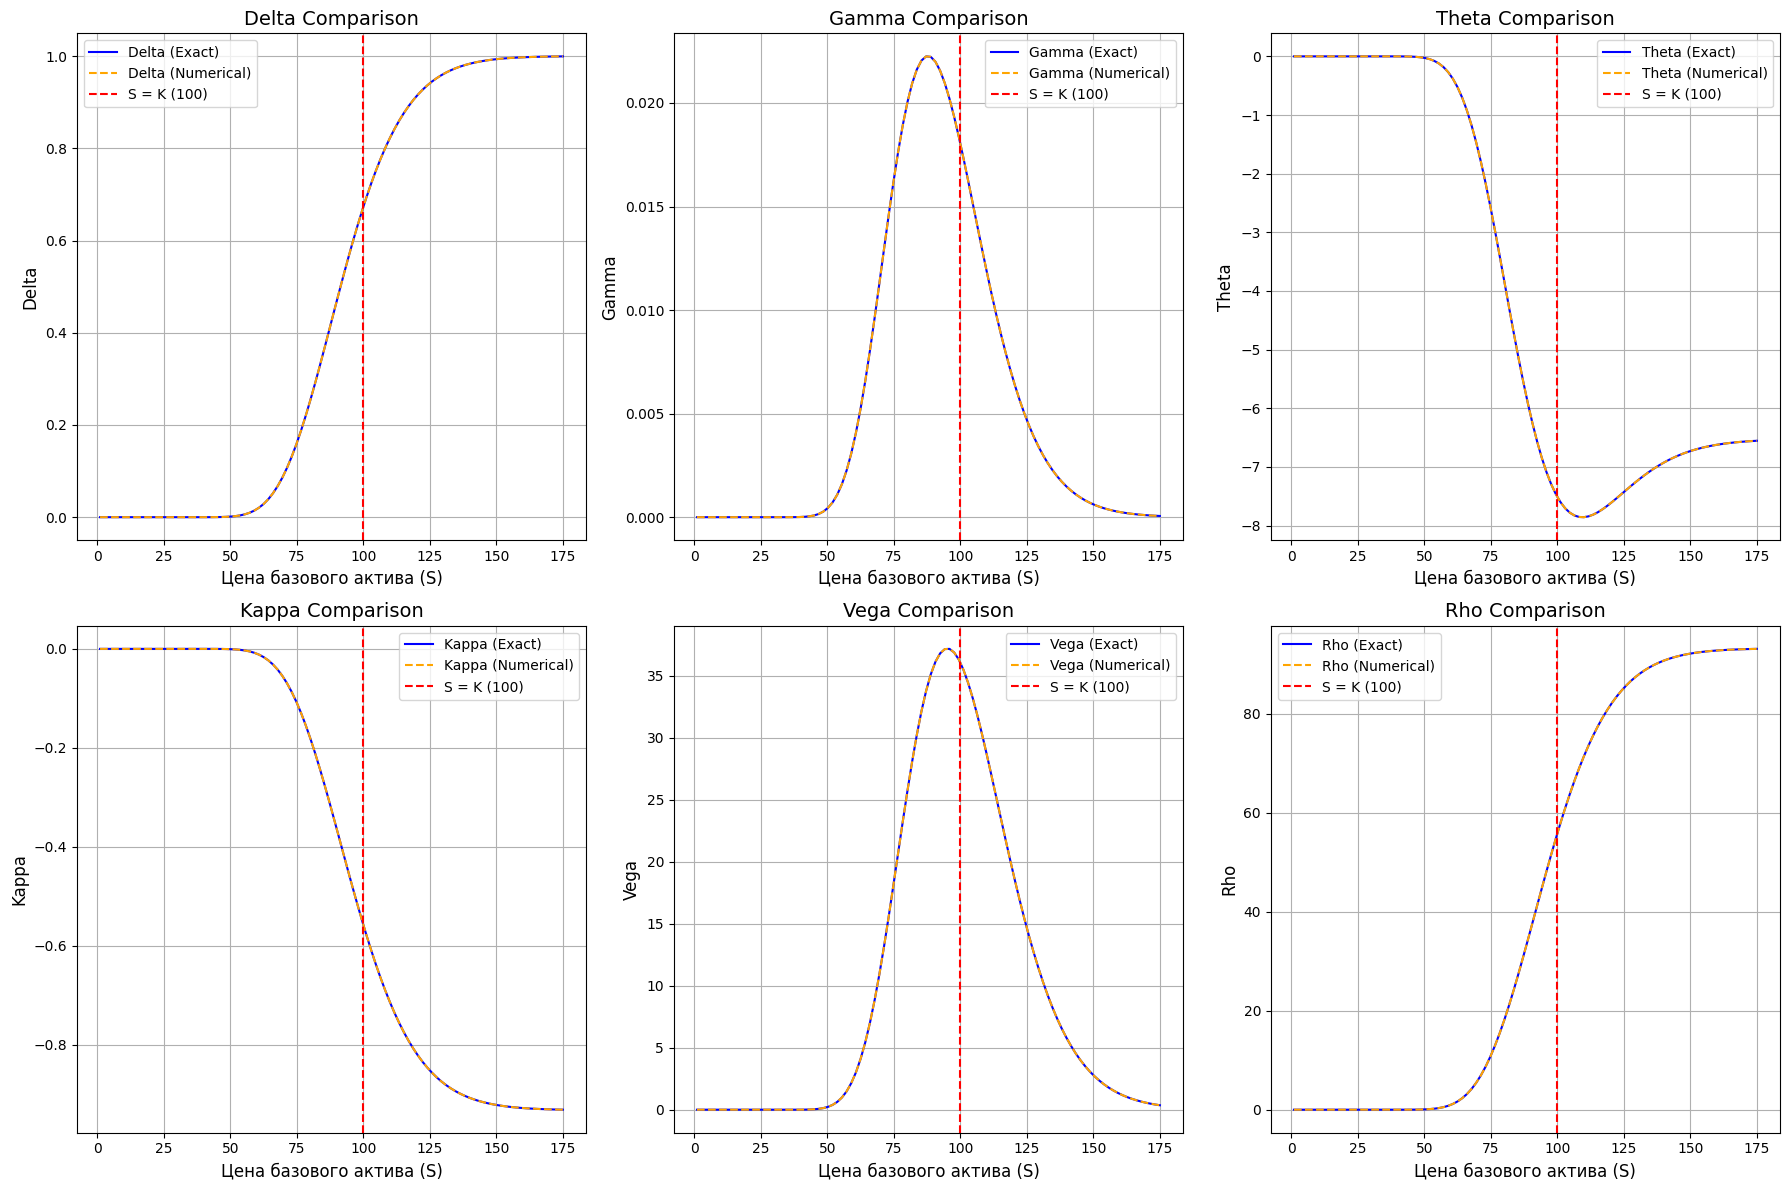

In [64]:
S = np.linspace(1, 175, 100)  # цены базового актива
K = 100  
r = 0.07  
T = 1  
sigma = 0.2  
plot_numerical_greeks(S, K, r, T, sigma, option_type='call')

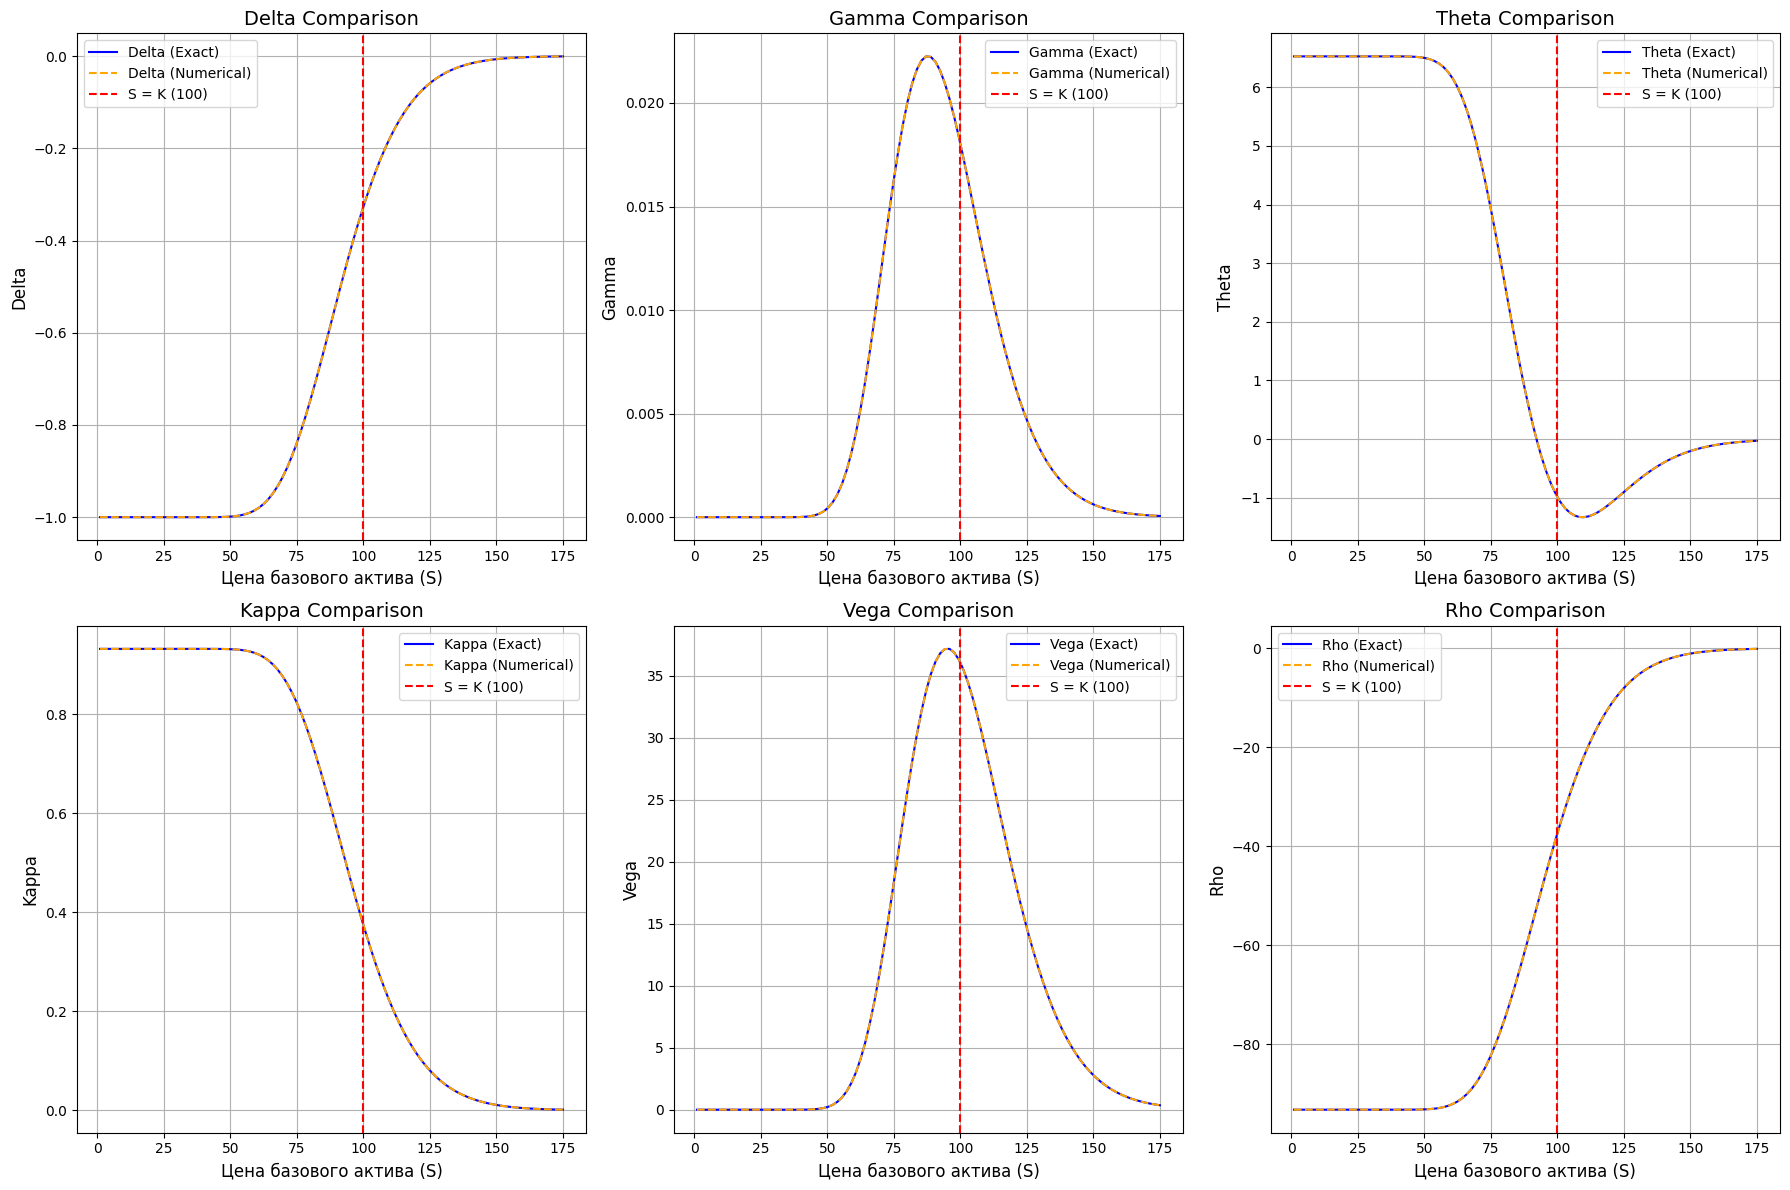

In [66]:
plot_numerical_greeks(S, K, r, T, sigma, option_type='put')

Задача. Постройте график трехмерной поверхности для описания зависимости греческих коэффициентов опциона  
*   кол,
*   пут

от стоимости базового актива и
количества дней до экспирации.

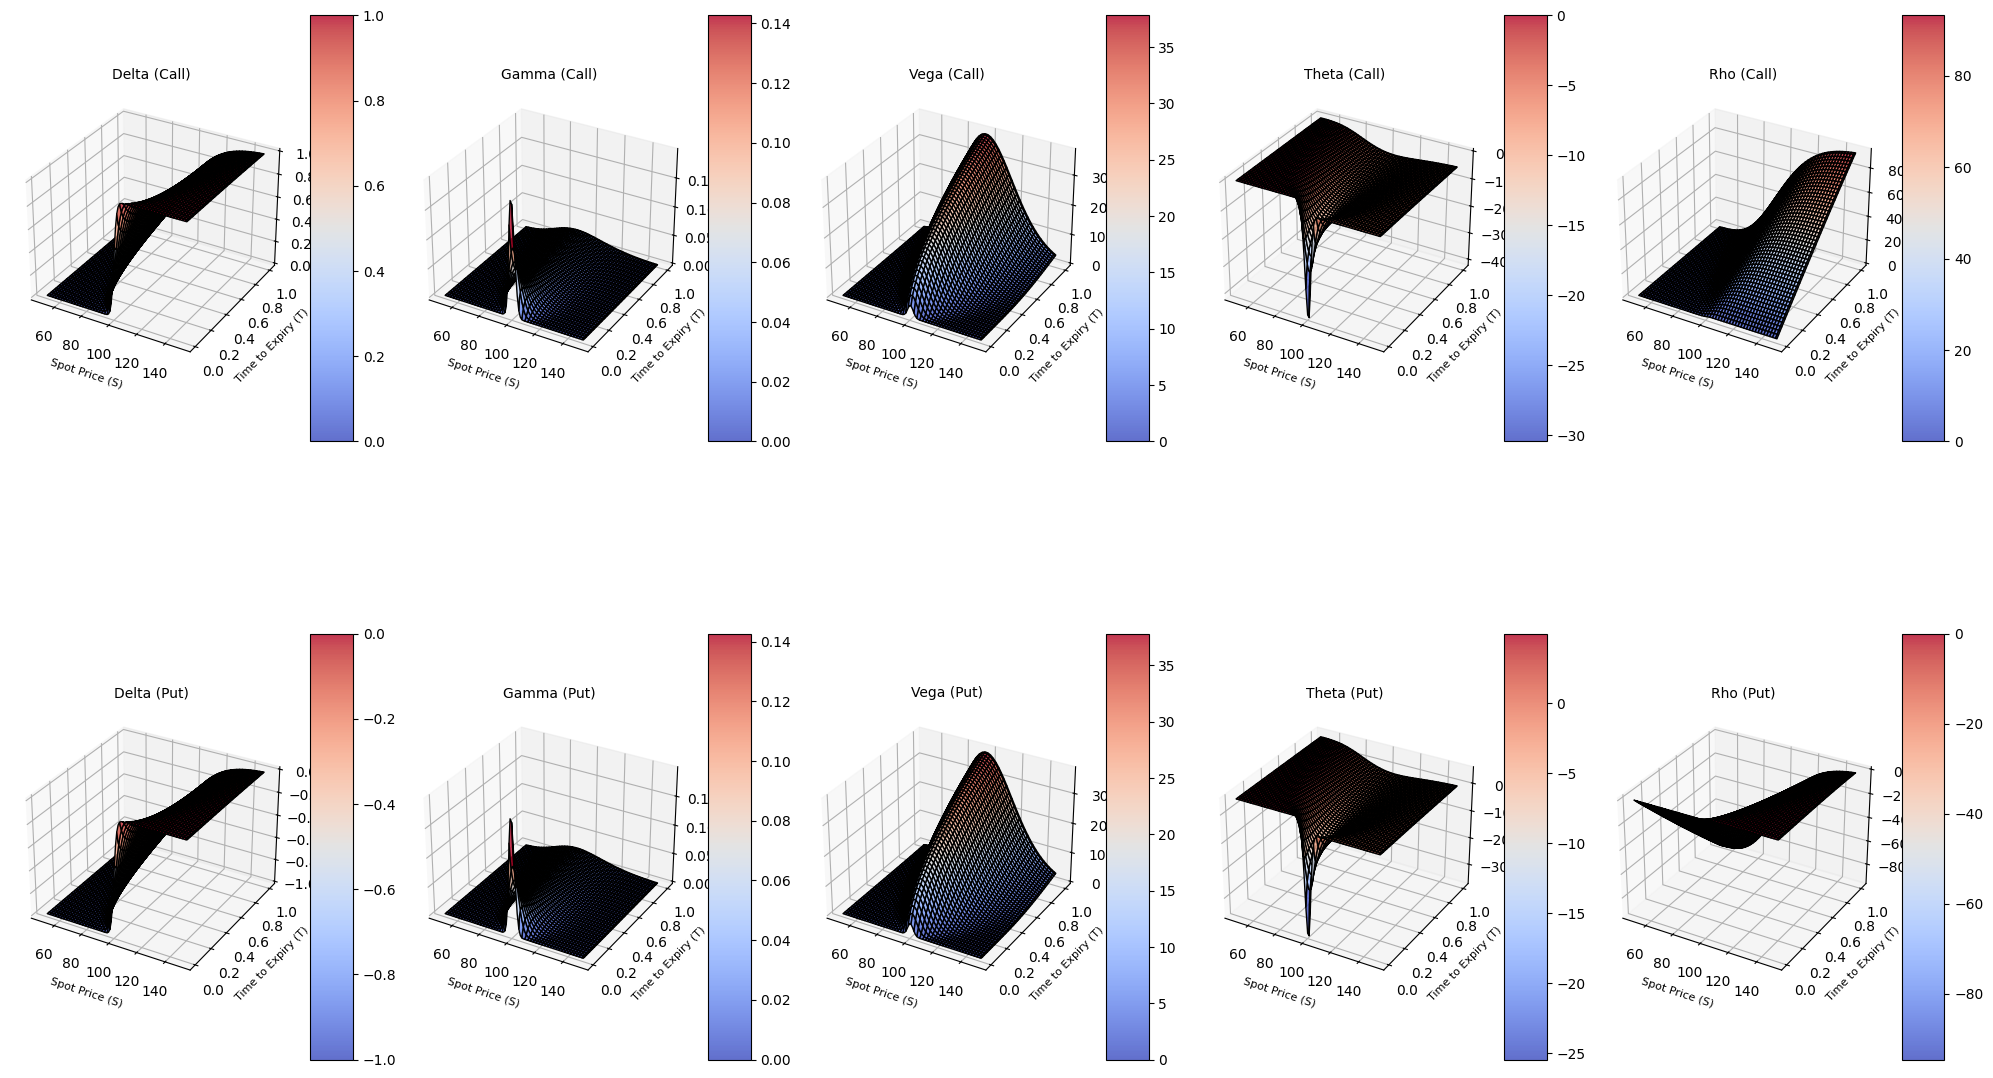

In [69]:
from mpl_toolkits.mplot3d import Axes3D

def delta(S, K, r, T, sigma, option_type):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    if option_type == 'call':
        return norm.cdf(d1)
    elif option_type == 'put':
        return -norm.cdf(-d1)

def gamma(S, K, r, T, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return norm.pdf(d1) / (S * sigma * np.sqrt(T))

def vega(S, K, r, T, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return S * norm.pdf(d1) * np.sqrt(T)

def theta(S, K, r, T, sigma, option_type):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    term1 = -(S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T))
    if option_type == 'call':
        term2 = -r * K * np.exp(-r * T) * norm.cdf(d2)
        return term1 + term2
    elif option_type == 'put':
        term2 = r * K * np.exp(-r * T) * norm.cdf(-d2)
        return term1 + term2

def rho(S, K, r, T, sigma, option_type):
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    if option_type == 'call':
        return K * T * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        return -K * T * np.exp(-r * T) * norm.cdf(-d2)


K = 100      
r = 0.05     
sigma = 0.2  
option_types = ['call', 'put']


S_values = np.linspace(50, 150, 100)     
T_values = np.linspace(0.01, 1, 100)     


S_grid, T_grid = np.meshgrid(S_values, T_values)


fig = plt.figure(figsize=(20, 15))


for i, greek_name in enumerate(['delta', 'gamma', 'vega', 'theta', 'rho']):
    for j, option_type in enumerate(option_types):
        
        if greek_name == 'delta':
            Z = delta(S_grid, K, r, T_grid, sigma, option_type)
        elif greek_name == 'gamma':
            Z = gamma(S_grid, K, r, T_grid, sigma)
        elif greek_name == 'vega':
            Z = vega(S_grid, K, r, T_grid, sigma)
        elif greek_name == 'theta':
            Z = theta(S_grid, K, r, T_grid, sigma, option_type)
        elif greek_name == 'rho':
            Z = rho(S_grid, K, r, T_grid, sigma, option_type)

        ax = fig.add_subplot(2, 5, i + 1 + j * 5, projection='3d')
        surf = ax.plot_surface(S_grid, T_grid, Z, cmap='coolwarm', edgecolor='k', alpha=0.8)
        ax.set_title(f'{greek_name.capitalize()} ({option_type.capitalize()})', fontsize=10)
        ax.set_xlabel('Spot Price (S)', fontsize=8)
        ax.set_ylabel('Time to Expiry (T)', fontsize=8)
        ax.set_zlabel(f'{greek_name.capitalize()}', fontsize=8)
        fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)


plt.tight_layout()
plt.show()

# Опционная стратегия

## Задача

Задача. С использование досок опционов [Nasdaq](https://www.nasdaq.com/market-activity/stocks/aapl/option-chain) или [MOEX](https://www.moex.com/ru/derivatives/optionsdesk.aspx) выберите ликвидный актив и реализуейте две [опционных стратегий](https://www.option.ru/glossary/strategy),
Покупка опциона пут. Long Put + Покупка стрэнгла. Long Strangle

Проанализируйте как влияет соотношение  спот цены базового актива $S$ и цены страйк $K$ для

опциона call:

*   $S > K$ -- в деньгах (in the money),   
*   $S = K$ -- около денег (at the money),
*   $S < K$ --  вне денег (out of the money) и

опциона put:
*   $S < K$ -- в деньгах (in the money),
*   $S = K$ -- около денег (at the money),  
*   $S > K$ -- вне денег (out of the money).

Определите максимальную прибыль и потери, если цена базового актива может вырасти в два раза (меньше нуля не может быть). Определите интервал безубыточности стратегии с учетом премии.

Постройте график функции выплат для каждой опционной стратегии.

In [80]:
import yfinance as yf
import pandas as pd


ticker = 'AAPL'
stock = yf.Ticker(ticker)
options_dates = stock.options  

# Выбираем первую доступную дату экспирации
expiry = options_dates[0]


calls = stock.option_chain(expiry).calls
puts = stock.option_chain(expiry).puts

# Сохраняем данные в CSV
calls.to_csv(f'{ticker}_calls_{expiry}.csv', index=False)
puts.to_csv(f'{ticker}_puts_{expiry}.csv', index=False)

print(f"Данные успешно сохранены для даты {expiry}")

Данные успешно сохранены для даты 2024-11-22


In [101]:
put = pd.read_csv('AAPL_puts_2024-11-22.csv')
call = pd.read_csv('AAPL_calls_2024-11-22.csv')
S = pd.read_csv('AAPL_intraday.csv')

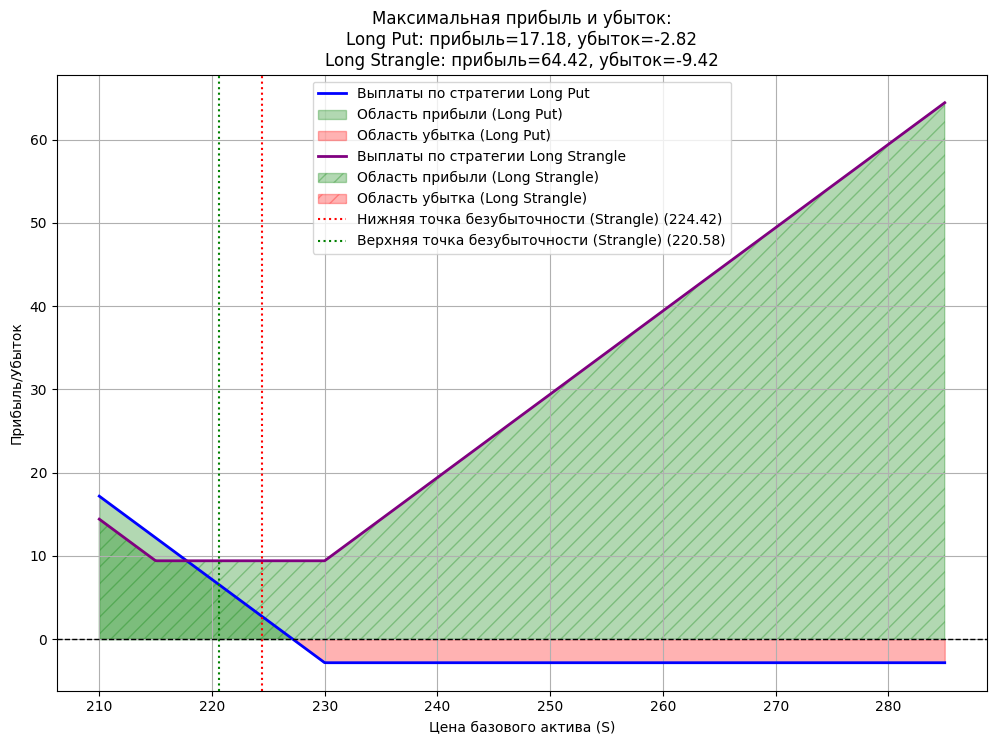

In [95]:
K_call = 215  
K_put = 230   
premium_call = 2.76 
premium_put = 2.82   
S_min = 210  
S_max = 285  
S = np.linspace(S_min, S_max, 500)  

payoff_put = np.maximum(K_put - S, 0) - premium_put


payoff_call = np.maximum(S - K_call, 0) - premium_call
payoff_strangle = payoff_call + payoff_put

breakeven_lower = K_put - (premium_call + premium_put)
breakeven_upper = K_call + (premium_call + premium_put)

max_profit_put = np.max(payoff_put)
max_loss_put = np.min(payoff_put)

max_profit_strangle = np.max(payoff_strangle)
max_loss_strangle = -np.min(payoff_strangle)


plt.figure(figsize=(12, 8))

plt.plot(S, payoff_put, label='Выплаты по стратегии Long Put', linewidth=2, color='blue')
plt.fill_between(S, payoff_put, 0, where=(payoff_put > 0), color='green', alpha=0.3, label='Область прибыли (Long Put)')
plt.fill_between(S, payoff_put, 0, where=(payoff_put < 0), color='red', alpha=0.3, label='Область убытка (Long Put)')

plt.plot(S, payoff_strangle, label='Выплаты по стратегии Long Strangle', linewidth=2, color='purple')
plt.fill_between(S, payoff_strangle, 0, where=(payoff_strangle > 0), color='green', alpha=0.3, label='Область прибыли (Long Strangle)', hatch='//')
plt.fill_between(S, payoff_strangle, 0, where=(payoff_strangle < 0), color='red', alpha=0.3, label='Область убытка (Long Strangle)', hatch='//')

plt.axvline(breakeven_lower, color='red', linestyle=':', label=f'Нижняя точка безубыточности (Strangle) ({breakeven_lower:.2f})')
plt.axvline(breakeven_upper, color='green', linestyle=':', label=f'Верхняя точка безубыточности (Strangle) ({breakeven_upper:.2f})')

plt.axhline(0, color='black', linewidth=1, linestyle='--')

plt.title(f'Максимальная прибыль и убыток:\n'
          f'Long Put: прибыль={max_profit_put}, убыток={max_loss_put}\n'
          f'Long Strangle: прибыль={max_profit_strangle}, убыток={max_loss_strangle}')
plt.xlabel('Цена базового актива (S)')
plt.ylabel('Прибыль/Убыток')
plt.legend(loc='best')
plt.grid()
plt.show()

Long Put:

Покупка опциона пут позволяет получать прибыль, если цена актива падает ниже страйка (K_put), с учетом уплаченной премии.


Long Strangle:

Стратегия, включающая покупку колл- и пут-опционов с разными страйками (K_call и K_put). Она приносит прибыль при сильном движении цены базового актива вверх или вниз.

## Задача (оптимальный набор)

Задача. С использование доски опционов [Nasdaq](https://www.nasdaq.com/market-activity/stocks/aapl/option-chain) найдите оптимальный набор опционных контрактов $$
X=\{X_c, X_p\},
$$
где
$$
X_c=\{x_i^c \in
\mathbb{Z}: L\le x_i^c \le U, i \in I\},
$$
$$
X_p=\{x_i^p
\in \mathbb{Z}: L \le x_i^p \le U, i \in I\},
$$
здесь
$x_i^c$, $x_i^p>0$ -- количество опционов колл и пут для покупки, $x_i^c$, $x_i^p<0$ -- для продажи. Если
$x_i^c=0$ или $x_i^p=0$, то $i$-ый контракт
не входит в портфель, $L<0$ и $U>0$ -- нижняя и верхняя границы количества контрактов в портфеле соответственно,
$I=\{1,2, \ldots, n\}$ -- набор индексов.

При разработке стратегии придерживаться следующих преположений
*   покупки и продажи опционов можно осуществлять по ask- и bid-ценам,
*   можно занимать короткие и длинные позиции с учетом ликвидности контракта,
*  стратегия должна иметь защиту от падения и роста цен страйк на $x$\% от стоимости базового актива в момент времени $T$,
*  максимальный убыток стратегии ограничен величиной $\mathcal{L}$, равной $y$% от стоимости базового актива в момент времени $t=0$
*  стратегия имеет начальную стоимость $C(t,X)$, равную $w$ условных единиц капитала.

https://arxiv.org/pdf/1707.02087

In [114]:

subset = put.iloc[20:35][["strike", "ask", "bid"]]
subset.rename(columns={"ask": "ask_put", "bid": "bid_put"}, inplace=True)
option_put = {
    "strike": subset["strike"].tolist(),
    "ask_put": subset["ask_put"].tolist(),
    "bid_put": subset["bid_put"].tolist()
}

print(option_put)

{'strike': [202.5, 205.0, 207.5, 210.0, 212.5, 215.0, 217.5, 220.0, 222.5, 225.0, 227.5, 230.0, 232.5, 235.0, 237.5], 'ask_put': [0.06, 0.07, 0.08, 0.09, 0.11, 0.14, 0.21, 0.32, 0.56, 1.08, 1.86, 3.15, 5.5, 7.3, 10.15], 'bid_put': [0.04, 0.06, 0.07, 0.08, 0.1, 0.13, 0.19, 0.3, 0.55, 1.05, 1.83, 3.05, 5.2, 7.0, 9.8]}


In [110]:
subset = call.iloc[20:35][["strike", "ask", "bid"]]
subset.rename(columns={"ask": "ask_call", "bid": "bid_call"}, inplace=True)
option_call = {
    "strike": subset["strike"].tolist(),
    "ask_call": subset["ask_call"].tolist(),
    "bid_call": subset["bid_call"].tolist()
}

print(option_call)

{'strike': [205.0, 207.5, 210.0, 212.5, 215.0, 217.5, 220.0, 222.5, 225.0, 227.5, 230.0, 232.5, 235.0, 237.5, 240.0], 'ask_call': [22.8, 20.2, 18.25, 15.9, 12.7, 10.25, 8.2, 5.55, 3.8, 2.45, 1.15, 0.5, 0.2, 0.07, 0.04], 'bid_call': [22.1, 19.95, 17.65, 14.2, 11.8, 10.0, 7.95, 5.5, 3.7, 2.39, 1.13, 0.48, 0.19, 0.06, 0.03]}


Оптимальные контракты (Call): [-7. -7. -7. -2. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]
Оптимальные контракты (Put): [10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]
Общая стоимость стратегии: 295.35
Прибыль при росте цены: 2668.9499999999966
Прибыль при падении цены: 3802.4999999999995
Средняя прибыль: 3235.724999999998


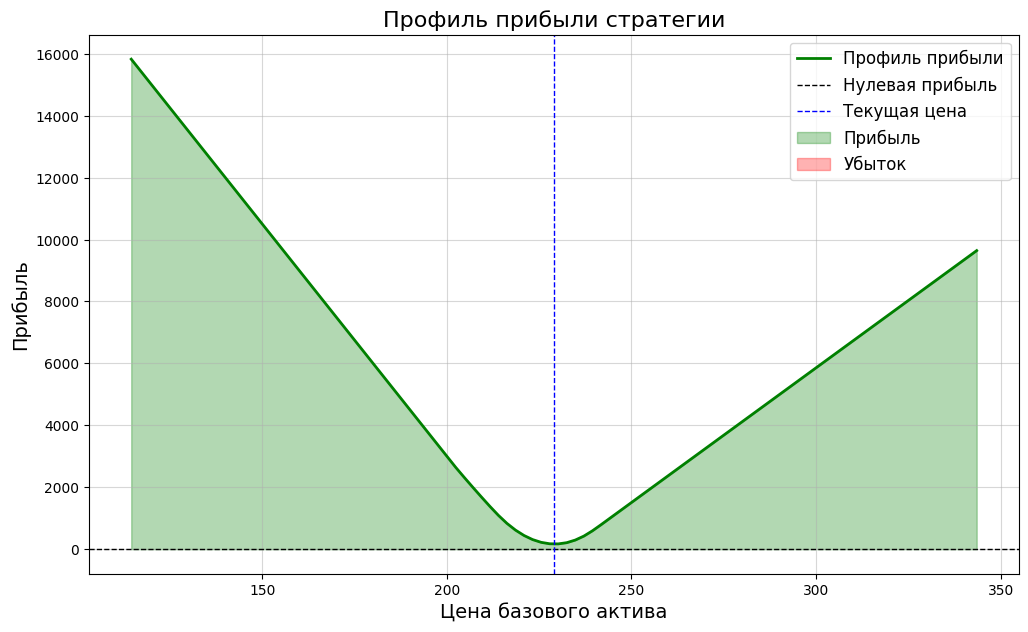

In [115]:
def optimize_option_portfolio(option_call, option_put, S0, x_pct, y_pct, budget, L, U):
    strikes_call = np.array(option_call['strike'])
    strikes_put = np.array(option_put['strike'])
    ask_call = np.array(option_call['ask_call'])
    bid_call = np.array(option_call['bid_call'])
    ask_put = np.array(option_put['ask_put'])
    bid_put = np.array(option_put['bid_put'])
    ST_up = S0 * (1 + x_pct)
    ST_down = S0 * (1 - x_pct)
    L_max = y_pct * S0


    n_call = len(strikes_call)
    n_put = len(strikes_put)
    x_c = cp.Variable(n_call, integer=True)  
    x_p = cp.Variable(n_put, integer=True)  

    profit_call_up = cp.sum(cp.multiply(x_c, cp.pos(ST_up - strikes_call)))  
    profit_call_down = cp.sum(cp.multiply(x_c, cp.pos(ST_down - strikes_call)))  

    profit_put_up = cp.sum(cp.multiply(x_p, cp.pos(strikes_put - ST_up))) 
    profit_put_down = cp.sum(cp.multiply(x_p, cp.pos(strikes_put - ST_down)))  

    payoff_up = profit_call_up + profit_put_up  
    payoff_down = profit_call_down + profit_put_down  

    cost_call = cp.sum(cp.multiply(x_c, ask_call))
    cost_put = cp.sum(cp.multiply(x_p, ask_put))
    cost = cost_call + cost_put

    constraints = [
        cost <= budget,  
        x_c >= L, x_c <= U,  
        x_p >= L, x_p <= U,  
        payoff_up >= -L_max,  
        payoff_down >= -L_max  
    ]

    objective = cp.Maximize((payoff_up + payoff_down) / 2 - cost)  # Средняя прибыль - затраты
    problem = cp.Problem(objective, constraints)
    problem.solve()

    return {
        "optimal_call": x_c.value,
        "optimal_put": x_p.value,
        "total_cost": cost.value,
        "payoff_up": payoff_up.value,
        "payoff_down": payoff_down.value,
        "average_payoff": (payoff_up.value + payoff_down.value) / 2,
        "strikes_call": strikes_call,
        "strikes_put": strikes_put
    }

def plot_payoff(option_call, option_put, S0, result):

    strikes_call = result["strikes_call"]
    strikes_put = result["strikes_put"]
    optimal_call = result["optimal_call"]
    optimal_put = result["optimal_put"]

    prices = np.linspace(S0 * 0.5, S0 * 1.5, 100)
    payoff = np.zeros_like(prices)
    for i, price in enumerate(prices):
        payoff_call = np.sum(optimal_call * np.maximum(price - strikes_call, 0))
        payoff_put = np.sum(optimal_put * np.maximum(strikes_put - price, 0))
        payoff[i] = payoff_call + payoff_put

    plt.figure(figsize=(12, 7))
    plt.plot(prices, payoff, label="Профиль прибыли", linewidth=2, color="green")
    plt.axhline(0, color='black', linestyle='--', linewidth=1, label="Нулевая прибыль")
    plt.axvline(S0, color='blue', linestyle='--', linewidth=1, label="Текущая цена")
    plt.fill_between(prices, payoff, where=(payoff > 0), color="green", alpha=0.3, label="Прибыль")
    plt.fill_between(prices, payoff, where=(payoff < 0), color="red", alpha=0.3, label="Убыток")
    plt.title("Профиль прибыли стратегии", fontsize=16)
    plt.xlabel("Цена базового актива", fontsize=14)
    plt.ylabel("Прибыль", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.5)
    plt.show()


S0 = 229   
x_pct = 0.15   
y_pct = 0.05   
budget = 300   
L = -7
U = 10

result = optimize_option_portfolio(option_call, option_put, S0, x_pct, y_pct, budget, L, U)

print("Оптимальные контракты (Call):", result["optimal_call"])
print("Оптимальные контракты (Put):", result["optimal_put"])
print("Общая стоимость стратегии:", result["total_cost"])
print("Прибыль при росте цены:", result["payoff_up"])
print("Прибыль при падении цены:", result["payoff_down"])
print("Средняя прибыль:", result["average_payoff"])

plot_payoff(option_call, option_put, S0, result)